In [1]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [2]:
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file('flower_photos', origin=dataset_url,  cache_dir='D:\Machine Learning\Flower Classification', untar=True)

228813984/228813984 [==============================] - 109s 0us/step


In [4]:
data_dir

'D:\\Machine Learning\\Flower Classification\\datasets\\flower_photos'

In [5]:
import pathlib
data_dir = pathlib.Path(data_dir)
data_dir

WindowsPath('D:/Machine Learning/Flower Classification/datasets/flower_photos')

In [6]:
list(data_dir.glob('*/*.jpg'))[:5]

[WindowsPath('D:/Machine Learning/Flower Classification/datasets/flower_photos/daisy/100080576_f52e8ee070_n.jpg'),
 WindowsPath('D:/Machine Learning/Flower Classification/datasets/flower_photos/daisy/10140303196_b88d3d6cec.jpg'),
 WindowsPath('D:/Machine Learning/Flower Classification/datasets/flower_photos/daisy/10172379554_b296050f82_n.jpg'),
 WindowsPath('D:/Machine Learning/Flower Classification/datasets/flower_photos/daisy/10172567486_2748826a8b.jpg'),
 WindowsPath('D:/Machine Learning/Flower Classification/datasets/flower_photos/daisy/10172636503_21bededa75_n.jpg')]

In [7]:
image_count = len(list(data_dir.glob('*/*.jpg')))
print(image_count)

3670


In [8]:
roses = list(data_dir.glob('roses/*'))
roses[:5]

[WindowsPath('D:/Machine Learning/Flower Classification/datasets/flower_photos/roses/10090824183_d02c613f10_m.jpg'),
 WindowsPath('D:/Machine Learning/Flower Classification/datasets/flower_photos/roses/102501987_3cdb8e5394_n.jpg'),
 WindowsPath('D:/Machine Learning/Flower Classification/datasets/flower_photos/roses/10503217854_e66a804309.jpg'),
 WindowsPath('D:/Machine Learning/Flower Classification/datasets/flower_photos/roses/10894627425_ec76bbc757_n.jpg'),
 WindowsPath('D:/Machine Learning/Flower Classification/datasets/flower_photos/roses/110472418_87b6a3aa98_m.jpg')]

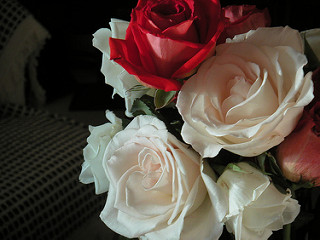

In [9]:
PIL.Image.open(str(roses[1]))

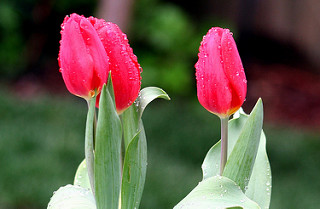

In [10]:
tulips = list(data_dir.glob('tulips/*'))
PIL.Image.open(str(tulips[0]))

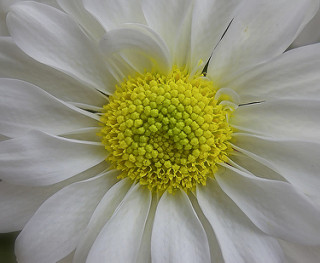

In [13]:
daisy = list(data_dir.glob('daisy/*'))
PIL.Image.open(str(daisy[0]))

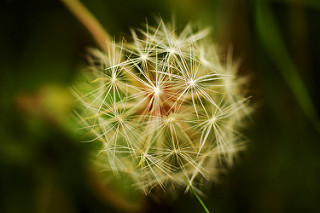

In [14]:
dandelion = list(data_dir.glob('dandelion/*'))
PIL.Image.open(str(dandelion[0]))

In [15]:
flowers_images_dict = {
    'roses': list(data_dir.glob('roses/*')),
    'daisy': list(data_dir.glob('daisy/*')),
    'dandelion': list(data_dir.glob('dandelion/*')),
    'sunflowers': list(data_dir.glob('sunflowers/*')),
    'tulips': list(data_dir.glob('tulips/*')),
}

In [16]:
flowers_labels_dict = {
    'roses': 0,
    'daisy': 1,
    'dandelion': 2,
    'sunflowers': 3,
    'tulips': 4,
}

In [17]:
flowers_images_dict['roses'][:5]

[WindowsPath('D:/Machine Learning/Flower Classification/datasets/flower_photos/roses/10090824183_d02c613f10_m.jpg'),
 WindowsPath('D:/Machine Learning/Flower Classification/datasets/flower_photos/roses/102501987_3cdb8e5394_n.jpg'),
 WindowsPath('D:/Machine Learning/Flower Classification/datasets/flower_photos/roses/10503217854_e66a804309.jpg'),
 WindowsPath('D:/Machine Learning/Flower Classification/datasets/flower_photos/roses/10894627425_ec76bbc757_n.jpg'),
 WindowsPath('D:/Machine Learning/Flower Classification/datasets/flower_photos/roses/110472418_87b6a3aa98_m.jpg')]

In [19]:
flowers_images_dict['roses'][0]

WindowsPath('D:/Machine Learning/Flower Classification/datasets/flower_photos/roses/10090824183_d02c613f10_m.jpg')

In [18]:
str(flowers_images_dict['roses'][0])

'D:\\Machine Learning\\Flower Classification\\datasets\\flower_photos\\roses\\10090824183_d02c613f10_m.jpg'

In [20]:
img = cv2.imread(str(flowers_images_dict['roses'][0]))

In [21]:
img.shape

(240, 179, 3)

In [35]:
img_height, img_width, c = cv2.resize(img,(180,180)).shape

In [23]:
X, y = [], []

for flower_name, images in flowers_images_dict.items():
    for image in images:
        img = cv2.imread(str(image))
        resized_img = cv2.resize(img,(180,180))
        X.append(resized_img)
        y.append(flowers_labels_dict[flower_name])

In [24]:
X = np.array(X)
y = np.array(y)

In [26]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [27]:
X_train_scaled = X_train / 255
X_test_scaled = X_test / 255

In [28]:
num_classes = 5

model = Sequential([
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
              
model.fit(X_train_scaled, y_train, epochs=30)  




Epoch 1/30


81/81 [==============================] - 10s 101ms/step - loss: 1.4015 - accuracy: 0.3974
Epoch 2/30
81/81 [==============================] - 9s 115ms/step - loss: 1.0452 - accuracy: 0.5889
Epoch 3/30
81/81 [==============================] - 10s 119ms/step - loss: 0.8701 - accuracy: 0.6691
Epoch 4/30
81/81 [==============================] - 10s 118ms/step - loss: 0.7054 - accuracy: 0.7470
Epoch 5/30
81/81 [==============================] - 10s 119ms/step - loss: 0.4744 - accuracy: 0.8264
Epoch 6/30
81/81 [==============================] - 10s 122ms/step - loss: 0.3081 - accuracy: 0.8879
Epoch 7/30
81/81 [==============================] - 9s 112ms/step - loss: 0.1748 - accuracy: 0.9447
Epoch 8/30
81/81 [==============================] - 9s 115ms/step - loss: 0.1063 - accuracy: 0.9720
Epoch 9/30
81/81 [==============================] - 9s 115ms/step - loss: 0.1219 - accuracy: 0.9654
Epoch 10/30
81/81 [==============================] - 9s 117ms/step - loss: 0.0448 - accura

In [29]:
model.evaluate(X_test_scaled,y_test)

35/35 [==============================] - 1s 32ms/step - loss: 2.0500 - accuracy: 0.6821


[2.050020217895508, 0.682107150554657]

In [30]:
predictions = model.predict(X_test_scaled)
predictions

35/35 [==============================] - 1s 34ms/step


array([[  3.3354814,  21.950012 ,  -5.1449337, -21.739227 ,  -6.3951106],
       [  6.669722 ,  -1.6175349, -13.491695 ,  -4.087267 ,   3.7212954],
       [ -5.101161 ,  -1.4273075,  13.012692 ,  -9.635462 , -10.331563 ],
       ...,
       [ -5.8959794, -12.120685 ,  -7.5748463,   2.1685104,  15.400409 ],
       [-13.908358 ,  19.004444 ,   5.0169086,  -5.9158278, -11.211867 ],
       [ -8.502071 ,  15.89179  ,   3.1849358, -16.105814 ,  -2.5689418]],
      dtype=float32)

In [31]:
score = tf.nn.softmax(predictions[0])

In [32]:
np.argmax(score)

1

In [33]:
y_test[0]

1

In [36]:
data_augmentation = keras.Sequential(
  [
    layers.experimental.preprocessing.RandomFlip("horizontal", 
                                                 input_shape=(img_height, 
                                                              img_width,
                                                              3)),
    layers.experimental.preprocessing.RandomRotation(0.1),
    layers.experimental.preprocessing.RandomZoom(0.1),
  ]
)

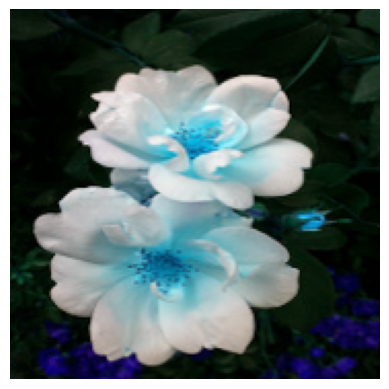

In [37]:
plt.axis('off')
plt.imshow(X[0])

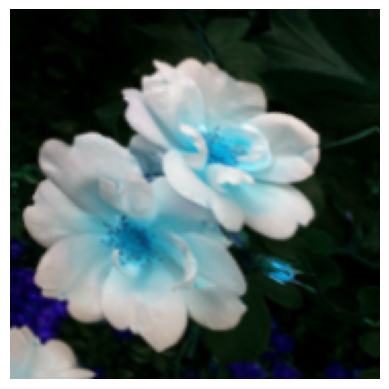

In [38]:
plt.axis('off')
plt.imshow(data_augmentation(X)[0].numpy().astype("uint8"))

In [39]:
num_classes = 5

model = Sequential([
  data_augmentation,
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
              
model.fit(X_train_scaled, y_train, epochs=30)

Epoch 1/30
81/81 [==============================] - 17s 189ms/step - loss: 1.3129 - accuracy: 0.4438
Epoch 2/30
81/81 [==============================] - 15s 187ms/step - loss: 1.0559 - accuracy: 0.5847
Epoch 3/30
81/81 [==============================] - 14s 168ms/step - loss: 0.9292 - accuracy: 0.6360
Epoch 4/30
81/81 [==============================] - 13s 164ms/step - loss: 0.8809 - accuracy: 0.6621
Epoch 5/30
81/81 [==============================] - 13s 160ms/step - loss: 0.8085 - accuracy: 0.6835
Epoch 6/30
81/81 [==============================] - 13s 161ms/step - loss: 0.7763 - accuracy: 0.7112
Epoch 7/30
81/81 [==============================] - 13s 165ms/step - loss: 0.7303 - accuracy: 0.7248
Epoch 8/30
81/81 [==============================] - 13s 162ms/step - loss: 0.7122 - accuracy: 0.7162
Epoch 9/30
81/81 [==============================] - 14s 171ms/step - loss: 0.6443 - accuracy: 0.7618
Epoch 10/30
81/81 [==============================] - 13s 165ms/step - loss: 0.6229 - accura

In [40]:
model.evaluate(X_test_scaled,y_test)

35/35 [==============================] - 1s 27ms/step - loss: 1.0048 - accuracy: 0.7275


[1.0047627687454224, 0.7275204062461853]

In [46]:
labels = ['roses','daisy','dandelion','sunflowers','tulips']

In [49]:
labels[4]

'tulips'

In [62]:
def find_img(iterate):
    plt.matshow(X_test[iterate])
    plt.xlabel(labels[y_test[iterate]])

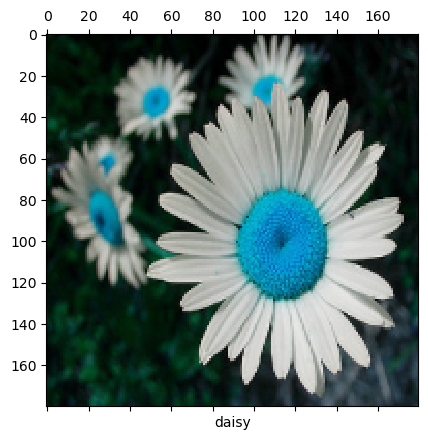

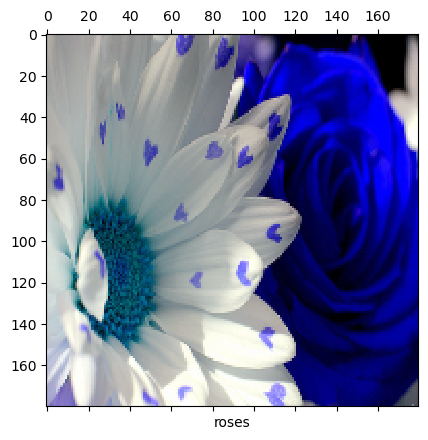

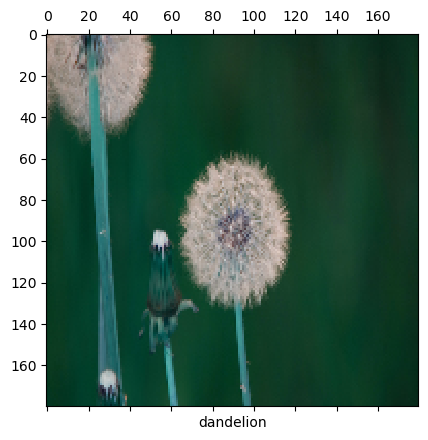

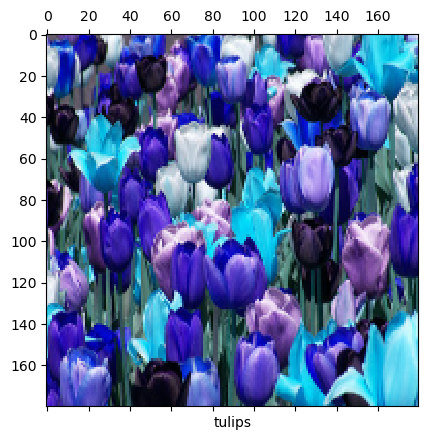

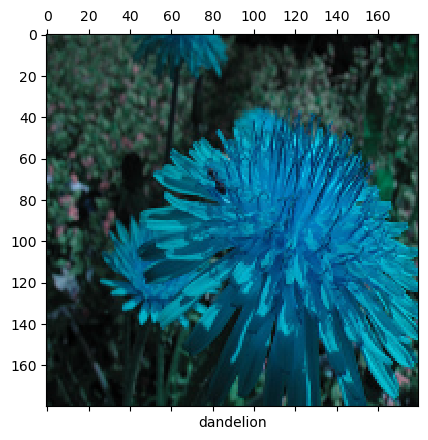

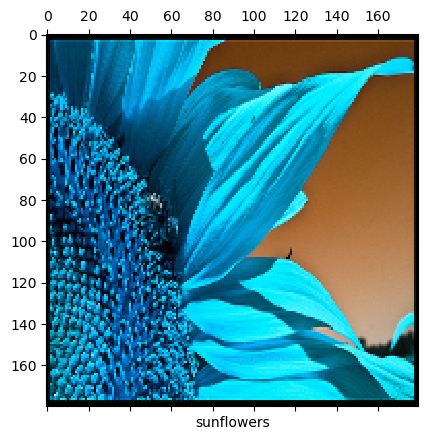

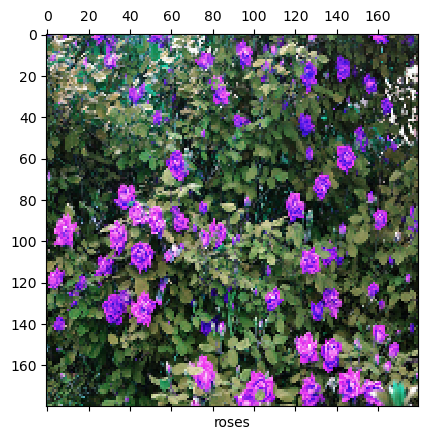

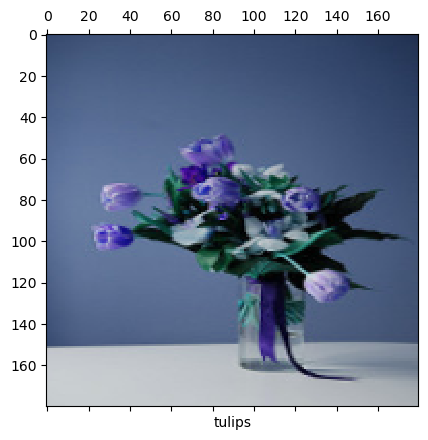

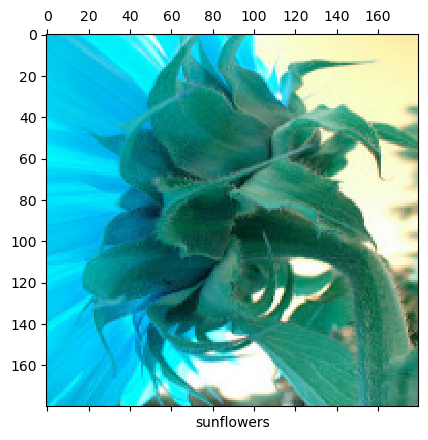

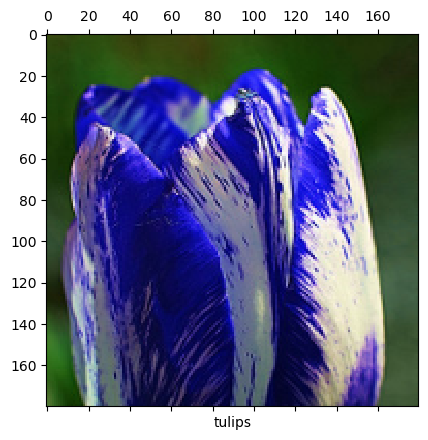

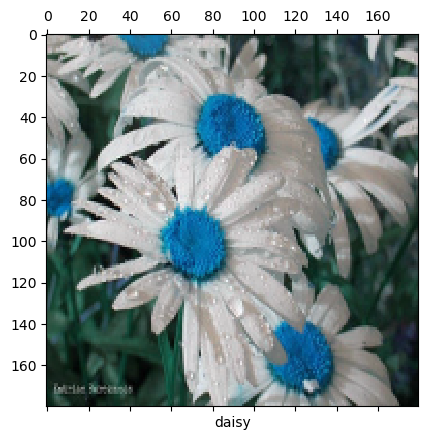

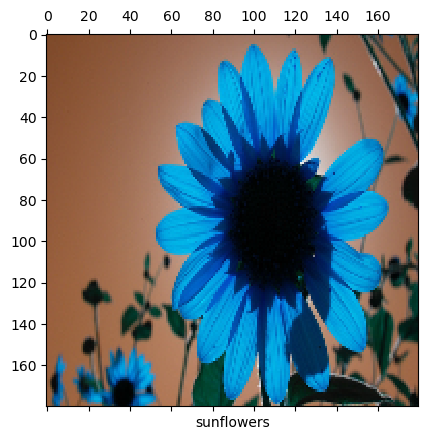

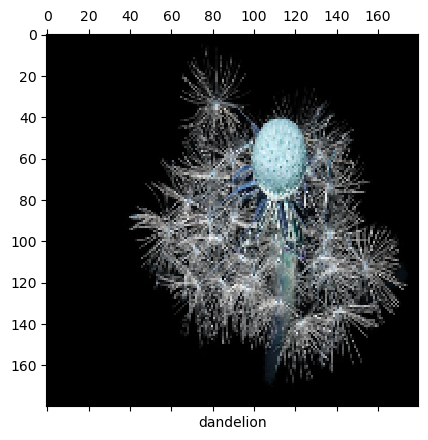

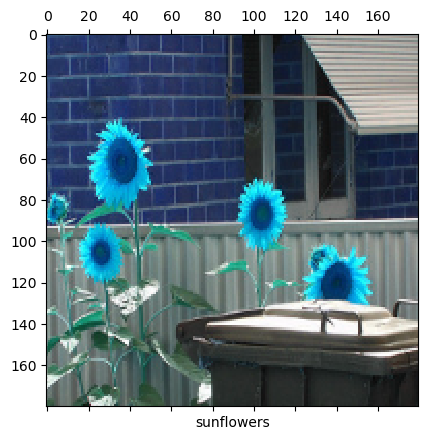

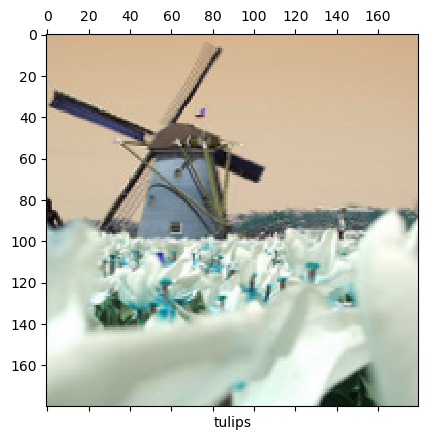

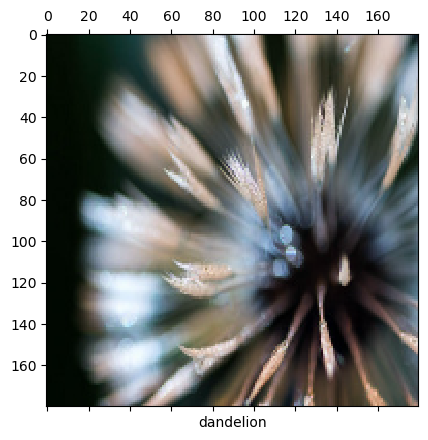

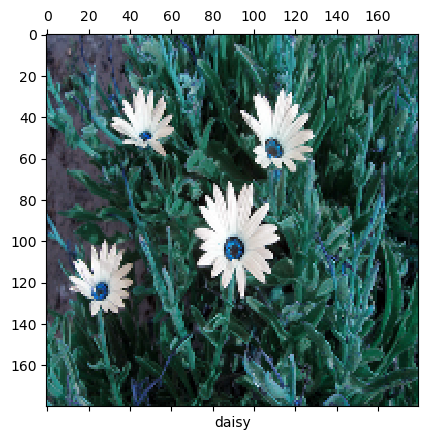

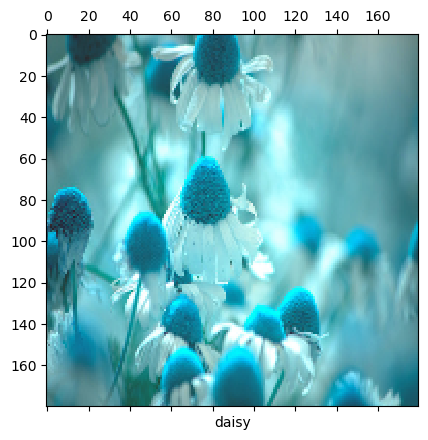

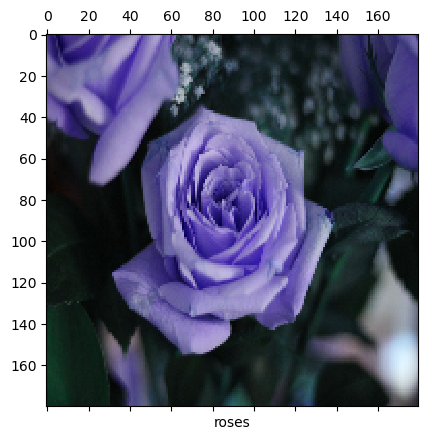

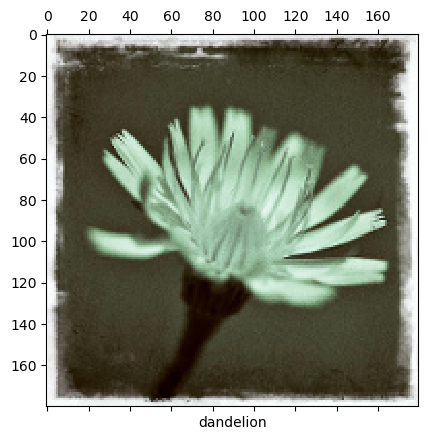

In [64]:
for i in range(0,20):
    find_img(i)